In [82]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.metrics import Precision, Recall
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, load_img, img_to_array

# stałe
number_of_classes = 10
image_size = (250, 250)
batch_size = 32
number_of_epochs = 3
root_folder = "..\\F1 teams"

# utworzenie zmiennej zawierającej nazwy zespołów 
list_of_teams = os.listdir(root_folder)
class_to_name = {}
for i, team in enumerate(list_of_teams):
    class_to_name[i] = team

images = []
labels = []

# załadowanie utworzonych danych
for team in os.listdir(root_folder):
    team_path = os.path.join(root_folder, team)

    if os.path.isdir(team_path):
        for img_file in os.listdir(team_path):
            if img_file == "logo.jpg":
                continue
            img_path = os.path.join(team_path, img_file)
            try:
                img = Image.open(img_path)
                img_array = np.array(img)
                images.append(img_array)
                labels.append(team)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images with corresponding labels.")


Loaded 2500 images with corresponding labels.


In [83]:
# przygotowanie danych
X = images / 255.0
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(labels))

# podział danych na zbiory uczące, testowe i walidacyjne
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [84]:
# definicje modeli
models = {}

def create_simple_model():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(number_of_classes, activation='softmax')  # Output layer
    ])
    
    model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer="adam",
                       metrics=['accuracy', Precision(), Recall()])
    model.summary()
    
    return model

def create_advanced_model():
    model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(number_of_classes, activation='softmax')
    ])
    
    model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer="adam",
                       metrics=['accuracy', Precision(), Recall()])
    model.summary()
    
    return model

model_simple = create_simple_model()
model_advanced = create_advanced_model()

C:\Users\Wojtek\PycharmProjects\uczenieMaszynowe\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 122, 122, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 119072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │    15,241,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,252,778 (58.18 MB)

 Trainable params: 15,252,778 (58.18 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │    27,558,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,653,962 (105.49 MB)

 Trainable params: 27,653,962 (105.49 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
# uczenie modeli
model_simple.fit(X_train, y_train, batch_size=32, epochs=number_of_epochs)
models[model_simple] = "Simple model"
model_advanced.fit(X_train, y_train, batch_size=32, epochs=number_of_epochs)
models[model_advanced] = "Advanced model"

Epoch 1/3
55/55 ━━━━━━━━━━━━━━━━━━━━ 26s 423ms/step - accuracy: 0.3739 - loss: 2.4877 - precision_16: 0.5739 - recall_16: 0.2224
Epoch 2/3
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 417ms/step - accuracy: 0.8867 - loss: 0.3231 - precision_16: 0.9362 - recall_16: 0.8175
Epoch 3/3
55/55 ━━━━━━━━━━━━━━━━━━━━ 26s 468ms/step - accuracy: 0.9836 - loss: 0.0723 - precision_16: 0.9853 - recall_16: 0.9785
Epoch 1/3
55/55 ━━━━━━━━━━━━━━━━━━━━ 46s 811ms/step - accuracy: 0.3828 - loss: 2.2036 - precision_17: 0.5605 - recall_17: 0.2354
Epoch 2/3
55/55 ━━━━━━━━━━━━━━━━━━━━ 42s 769ms/step - accuracy: 0.9182 - loss: 0.2047 - precision_17: 0.9290 - recall_17: 0.9143
Epoch 3/3
55/55 ━━━━━━━━━━━━━━━━━━━━ 42s 768ms/step - accuracy: 0.9951 - loss: 0.0250 - precision_17: 0.9952 - recall_17: 0.9951


In [86]:
# ręczne sprawdzenie modelu na danych spoza zbioru
# przykład - obraz wyglądający jak dane uczące, ale spoza zbioru
image_path = "..\\F1 teams\\test.jpg"

# przekształcenie obrazka do postaci przyjmowanej przez model
img = load_img(image_path, target_size=(250, 250))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


# ewaluacja modeli
for model in models:
    loss, accuracy, precision, recall = model.evaluate(X_val, y_val)
    print(
        f"Evaluation results for model '{models[model]}'\nValidation loss: {loss},\nvalidation Accuracy: {accuracy},\nvalidation precision: {precision},\nvalidation recall: {recall},\nvalidation F1-score: {2*(precision*recall)/(precision+recall)}")
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction,  axis=-1)[0]
    print(f"Expected class: Ferrari")
    print(f"Predicted class ({models[model]}): {class_to_name[predicted_class]}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 1.0000 - loss: 0.0050 - precision_16: 1.0000 - recall_16: 1.0000
Evaluation results for model 'Simple model'
Validation loss: 0.005412366706877947,
validation Accuracy: 1.0,
validation precision: 1.0,
validation recall: 1.0,
validation F1-score: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Expected class: Ferrari
Predicted class (Simple model): Ferrari
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 1.0000 - loss: 0.0011 - precision_17: 1.0000 - recall_17: 1.0000
Evaluation results for model 'Advanced model'
Validation loss: 0.0011468082666397095,
validation Accuracy: 1.0,
validation precision: 1.0,
validation recall: 1.0,
validation F1-score: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Expected class: Ferrari
Predicted class (Advanced model): Ferrari


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


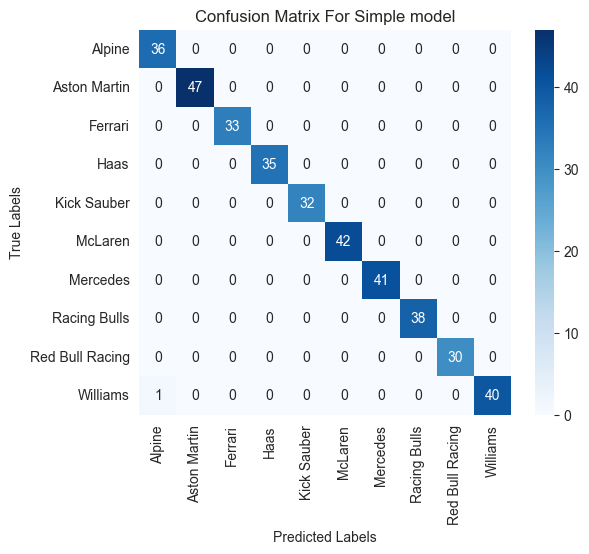

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step


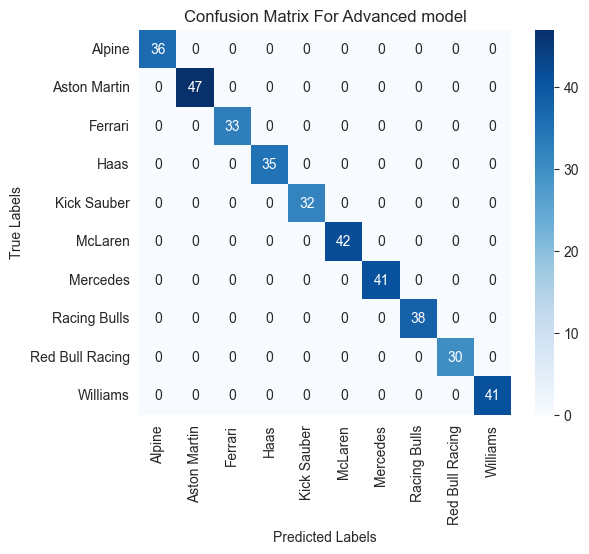

                 precision    recall  f1-score   support

         Alpine       1.00      1.00      1.00        36
   Aston Martin       1.00      1.00      1.00        47
        Ferrari       1.00      1.00      1.00        33
           Haas       1.00      1.00      1.00        35
    Kick Sauber       1.00      1.00      1.00        32
        McLaren       1.00      1.00      1.00        42
       Mercedes       1.00      1.00      1.00        41
   Racing Bulls       1.00      1.00      1.00        38
Red Bull Racing       1.00      1.00      1.00        30
       Williams       1.00      1.00      1.00        41

       accuracy                           1.00       375
      macro avg       1.00      1.00      1.00       375
   weighted avg       1.00      1.00      1.00       375



In [87]:
# wyświetlenie "confusion matrix"
for model in models:
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=-1)
    y_true_classes = y_test.argmax(axis=1)
    
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix For {models[model]}")
    plt.show()

print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))